In [1]:
# k-means
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
data = pd.read_csv('country_clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


(-90.0, 90.0)

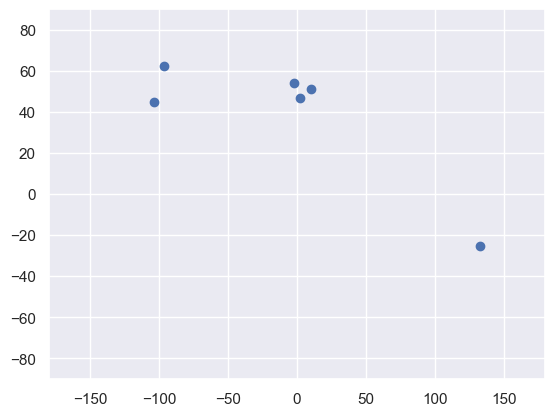

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])
# Longitude and Latitude ranges
plt.xlim(-180, 180)
plt.ylim(-90, 90)

In [4]:
# iloc - slices df, (row indices , col indices)
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
kmeans = KMeans(2) # 2 clusters
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,0


(-90.0, 90.0)

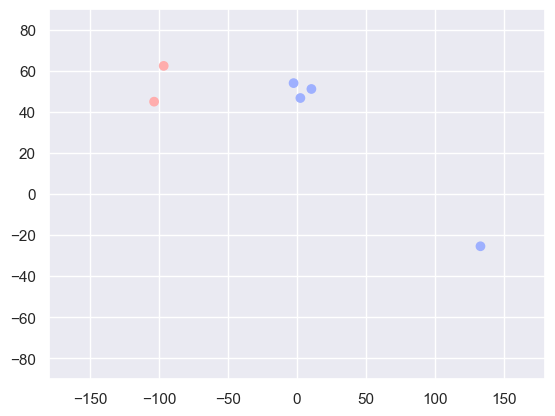

In [6]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='berlin')
# Longitude and Latitude ranges
plt.xlim(-180, 180)
plt.ylim(-90, 90)

In [7]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French': 1, 'German': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [8]:
x = data_mapped.iloc[:, 3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [9]:
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,0


(-90.0, 90.0)

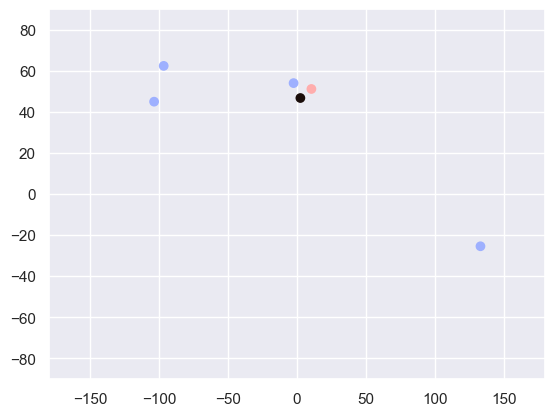

In [10]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='berlin')
# Longitude and Latitude ranges
plt.xlim(-180, 180)
plt.ylim(-90, 90)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


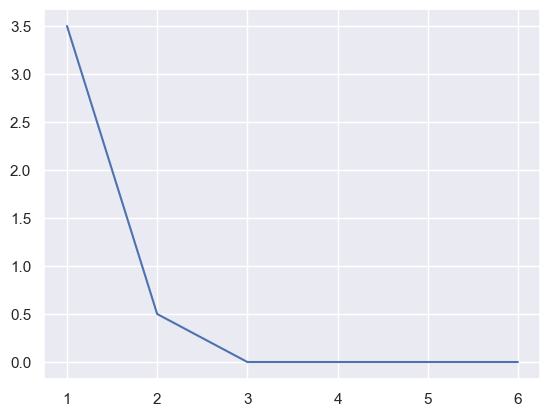

In [11]:
# elbow method
wcss = [] # within cluster sum of squares 
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss # seq. of decreasing nums

num_of_clusters = range(1, 7)
plt.plot(num_of_clusters, wcss)